<h1> Basic Classifier in scikit-learn for handwritten digits </h1>

This is a slightly modified version for the official scikit-learn tutorial on classification.
This tutorial is futher explained here: https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction
You can view the whole code as a script here: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

<h2> Preparing the data </h2>

Start by import scikit learn (sklearn) to perform machine learning operations and matplotlib to plot the data and results

In [45]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

The MNIST dataset of handwritten digits is one of the oldest datasets solved by machine learning. Our goal is to use an algorithm to predict what number is written in the image. The data itself is stored online and already embedded in scikit learn "dataset" module. Hence, when using your own data later in the course, the process of loading said data will differ.

In [46]:
# Load the dataset from scikit-learn
digits = datasets.load_digits()

Before using any algorithms, it is always a good idea to explore the dataset. Usually a dataset for supervised learning contains two types of data. First the data that describes the object, usually called features. In this case the features are the pixels of the image, 8x8 to be exact. Since this dataset is integrated in scikit-learn we can print its features using .data, however normally the features are usually denoted as some kind of matrix X or are part of a complete dataframe which consists of all data. We start by looking at the features.

In [47]:
print(digits.data) 

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Since its very hard to get a clue of the image by just looking at the grayscale values for the pixels, we use matplotlibs "imshow" capabilities to plot four pictures and the corresponding labels. The labels are the second part of the dataset, usually denoted by a matrix Y.

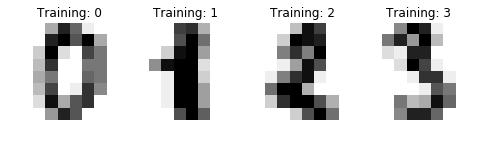

In [48]:
plt.rcParams['figure.figsize'] = (8, 6)

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Another name for the label is also target. Again since this dataset is integrated into scikit-learn we can just call this matrix using .target. In real world datasets the targets are usually the last column in the dataframe.

In [49]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Before using machine learning algorithms, it is always a good idea to change the data into a more "machine friendly" format. This usually includes some kind of matrix transformations. In this case we take our 8x8 pixel matrix and _flatten_ them into a 64 sized vector. 

This is also the step where you can get rid of outlying data or use feature engineering to generate new features.

In [50]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In the last step we take our data and split it into a training and testing set.

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data[:n_samples], digits.target[:n_samples], test_size=0.25, shuffle=False)

<h2> Learning and Predictiing </h2>

Machine Learning models are called estimators in scikit-learn, which is a fitting name. There a many different estimators for different tasks available. For this example we will use a Support Vector Machine (SVM) since it will give good results even on small datasets.

When constructing a SVM we need to specify two hyperparameters that need to be set. Gamma which is the kernel coefficient and C which is a regularization term. While testing machine learning models it's important to observe the influence on different parameters _given your particular training data_.

https://scikit-learn.org/stable/modules/svm.html / 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [52]:
clf = svm.SVC(gamma=0.005, C=100.)

This is the "magic moment". By calling .fit on the estimator we train the classifier on the given training set.  

In [53]:
clf.fit(x_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that we have a trained model. We can make predictions on the unseen test data.

In [54]:
expected = y_test
predicted = clf.predict(x_test)

<h2> Evaluation </h2>

We can compare the predicted values with expected values and calculate the metrics. 
The first print is the classification report featuring most of the metrics that are important for classification. 
The rows dictate the class, in this case numbers from 0 to 9, while the columns specify the kind of metric. 

Precision describes how accurate the model is. It shows the proportion of positive identification that were actually correct. A precision of .95 means that in 95% of the cases the model chose the correct class. 

Recall describes in what proportion the actual true positve values in the test data have been correctly labeled. 

The f1-score conveys the balance between precision and recall which are mostly in a tug of war.

Support is the number of each occurrences of each class in the y_test dataset. Optimally it should be balanced.

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/

In [55]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        43
          1       1.00      0.91      0.95        46
          2       1.00      0.93      0.96        43
          3       0.97      0.77      0.86        47
          4       1.00      0.92      0.96        48
          5       0.96      1.00      0.98        45
          6       1.00      0.91      0.96        47
          7       1.00      0.89      0.94        45
          8       0.52      1.00      0.68        41
          9       1.00      0.84      0.92        45

avg / total       0.95      0.91      0.92       450


Confusion matrix:
[[40  0  0  0  0  0  0  0  3  0]
 [ 0 42  0  0  0  0  0  0  4  0]
 [ 0  0 40  

Last but not least we should finish how we started. Plotting some data. In this case we will plot the first four pictures from the x_test set and title them by their predicted labels. 

Even though this plot doesn't have much statistical power, it sums our work up nicely and is a good ending for this tutorial.

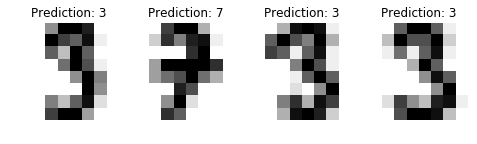

In [56]:
plt.rcParams['figure.figsize'] = (8, 6)

images_and_predictions = list(zip(x_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    image = image.reshape(8,8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

<h2> Conclusion </h2>

You should have learned: 
- The basic workflow when working with small datasets
- That different data needs to be preprocessed differently
- How to prepare your data (split into training and test sets)
- How to construct an estimator in scikit-learn, fit it with data and make predictions
- Statistically evaluate your findings and do some basic plotting

What you don't need to know for this particular exercise:
- How to exactly plot multiple images with matplotlib
- The internal workings of a support vector machine

Try it yourself!

1) Try changing the "gamma" Parameter of the SVM, can you achieve a better score? (Hint: 98% precision is possible with SVM)

2) Shuffle the data. What are the advantages of shuffling your data? What do you have to consider?

3) What does the confusion matrix that we plotted tell us?

<h2> Bonus </h2>

Plotting is fun, so let's do some more.
Depending on how you changed your SVM and how the data is shuffled you might have already seen some pictures, where the SVM predicted wrong numbers. We can investigate this more closely, by modifying the code above to plot up to 32 pictures that have been mislabeled.

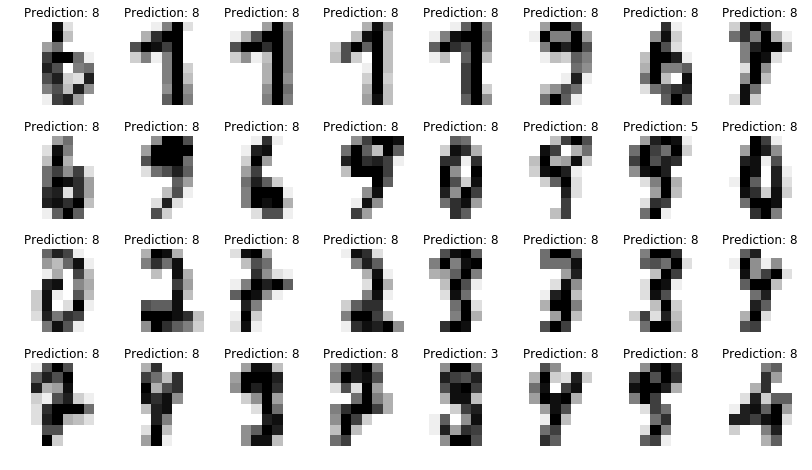

In [57]:
plt.rcParams['figure.figsize'] = (14, 8)

i = 1
images_and_predictions = list(zip(x_test, predicted, expected))
for index, (image, prediction, expection) in enumerate(images_and_predictions):
    if i > 32:
        break
    
    if prediction != expection:
        plt.subplot(4, 8, i)
        plt.axis('off')
        image = image.reshape(8,8)
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Prediction: %i' % prediction)
        i += 1 


plt.show()

You can now compare the mislabeled numbers above with the confusion matrix. In case you used the default values (gamma=0.005, C=100 and shuffle=False) you should see a bunch of numbers falsely classified as 8 which is reflected both in the plots and the confusion matrix).

Spoiler: Use the provided default values and set gamma=0.001. Run the training, predicting, evaluating and plotting process again (Hint: You can "Run All" Cells at once). Compare the plot of falsely classified numbers with the confusion matrix again. What changed? How high is our precision/accuracy?

<h2> Do it yourself </h2>

We successfully explored the MNIST dataset, trained a estimator and evaluated it. After that you had the possibility to modify the estimator in an iterative process and compare different metrics to find a good working model. 

Now it's time to do it all again. You can use any dataset that you find on the web. For example the Iris dataset is also considered an easy one, but take what you like.

Change the part that loads the data (Hint: "train_test_split" needs two matrixes X and Y representing your data and targets) and be ready to see error messages, because stuff brakes. That's normal, dont worry.

GL HF :)